# Neural Network From Scratch With Numpy

### CA4 @ AI Course

*Full Name:* Darya Ansaripour

*SID:* 610300022

In [3]:
from utils.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from utils.data import get_MNIST_data, get_normalized_MNIST_data, get_california_housing_data, get_california_housing_normalized__data
from builtins import range
import numpy as np
import matplotlib.pyplot as plt
from utils.solver import *
import pandas as pd
from sklearn.datasets import fetch_california_housing



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def print_mean_std(x,axis=0):
    print(f"  means: {x.mean(axis=axis)}")
    print(f"  stds:  {x.std(axis=axis)}\n")

# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks using a modular approach. For each layer we will implement a `forward` and a `backward` function. The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

After implementing a bunch of layers this way, we will be able to easily combine them to build classifiers with different architectures.

# Affine layer: forward
Implement the `affine_forward` function.

In [4]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N = x.shape[0] 
    x_reshaped = x.reshape(N, -1)  # Flatten each example into a 1D vector

    out = np.dot(x_reshaped, w) + b

    cache = (x, w, b)
    
    return out, cache
    

You can test your implementaion by running the following:

In [5]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])


# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769848888397517e-10


# Affine layer: backward
Now implement the `affine_backward` function and test your implementation using numeric gradient checking.

In [6]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """    
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    x, w, b = cache

    N = x.shape[0]
    x_reshaped = x.reshape(N, -1)  # Shape: (N, D)

    dw = np.dot(x_reshaped.T, dout)  # Gradient w.r.t weights, shape: (D, M)
    db = np.sum(dout, axis=0)  # Gradient w.r.t biases, shape: (M,)
    dx_reshaped = np.dot(dout, w.T)  # Gradient w.r.t reshaped input, shape: (N, D)
    dx = dx_reshaped.reshape(x.shape)  # Reshape back to input shape
    
    return dx,dw,db

In [7]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


# ReLU activation: forward
Implement the forward pass for the ReLU activation function in the `relu_forward` function and test your implementation using numeric gradient checking.

In [8]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    out = np.maximum(0, x)
    
    cache = x
    return out, cache

In [9]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


# ReLU activation: backward
Now implement the backward pass for the ReLU activation function in the `relu_backward` function.

In [10]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x = cache

    dx = dout * (x > 0)  # Derivative is 1 where x > 0, and 0 otherwise
    
    return dx

You can test your implementation using numeric gradient checking:

In [11]:
# Test the relu_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


# Sigmoid activation: forward
Implement the forward pass for the Sigmoid activation function in the `sigmoid_forward` function and test your implementation using numeric gradient checking.

In [12]:
def sigmoid_forward(x):
    """
    Computes the forward pass for a layer of Sigmoid.

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    ###########################################################################
    # TODO: Implement the Sigmoid forward pass.                               #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Compute the sigmoid activation
    out = 1 / (1 + np.exp(-x))

    cache = x
    
    return out, cache

In [13]:
# Test the sigmoid_forward function

x = np.linspace(-6, 6, num=12).reshape(3, 4)

out, _ = sigmoid_forward(x)
correct_out = np.array([[0.00247262, 0.00732514, 0.0214955 , 0.06138311],
                        [0.16296047, 0.36691963, 0.63308037, 0.83703953],
                        [0.93861689, 0.9785045 , 0.99267486, 0.99752738]])

# Compare your output with ours. The error should be on the order of e-7
print('Testing sigmoid_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing sigmoid_forward function:
difference:  6.383174040859927e-07


# Sigmoid activation: backward
Now implement the backward pass for the Sigmoid activation function in the `sigmoid_backward` function.

In [14]:
def sigmoid_backward(dout, cache):
    """
    Computes the backward pass for a layer of Sigmoid.

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    ###########################################################################
    # TODO: Implement the Sigmoid backward pass.                              #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    x = cache

    sigmoid_out = 1 / (1 + np.exp(-x))

    # Compute the gradient of the sigmoid
    dx = dout * sigmoid_out * (1 - sigmoid_out)
    
    return dx

You can test your implementation using numeric gradient checking:

In [15]:
# Test the sigmoid_backward function
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: sigmoid_forward(x)[0], x, dout)

_, cache = sigmoid_forward(x)
dx = sigmoid_backward(dout, cache)

# The error should be on the order of e-11
print('Testing sigmoid_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing sigmoid_backward function:
dx error:  3.446520386706568e-11


# "Sandwich" layers
There are some common patterns of layers that are frequently used in neural nets. For example, affine layers are frequently followed by a ReLU nonlinearity. Implement the forward and backward pass for the affine layer followed by a ReLU nonlinearity in the `affine_relu_forward` and `affine_relu_backward` functions. 

In [16]:
def affine_relu_forward(x, w, b):
    """
    Convenience layer that performs an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    ###########################################################################
    # TODO: Implement the affine-RELU forward pass.                           #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    affine_out, affine_cache = affine_forward(x, w, b) # Affine forward pass

    out, relu_cache = relu_forward(affine_out) # Relu forward pass

    cache = (affine_cache, relu_cache)

    return out, cache
    

In [17]:
def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    
    Inputs:
    - dout: Upstream derivatives, of any shape
    - cache: (fc_cache, relu_cache)
      
    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    ###########################################################################
    # TODO: Implement the affine-RELU backward pass.                          #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    affine_cache, relu_cache = cache

    drelu = relu_backward(dout, relu_cache) # Backward pass through ReLU

    dx, dw, db = affine_backward(drelu, affine_cache) # Backward pass through the affine layer

    return dx, dw, db

You can test your implementation using numeric gradient checking:

In [18]:
# Test the affine_relu_backward function

np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


# Loss Function: Softmax
Now implement the loss and gradient for softmax in the `softmax_loss` function.

In [19]:
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    ###########################################################################
    # TODO: Implement the softmax_loss function.                              #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Compute softmax probabilities
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute the loss (negative log likelihood)
    N = x.shape[0]
    correct_class_probs = probs[np.arange(N), y]
    loss = -np.sum(np.log(correct_class_probs)) / N

    # Compute gradient
    dx = probs
    dx[np.arange(N), y] -= 1
    dx /= N
    
    return loss,dx

You can make sure that the implementations are correct by running the following:

In [20]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing softmax_loss:
loss:  2.302545844500738
dx error:  9.483503037636722e-09


# Loss Function: MSE
Now implement the loss and gradient for mean squared error in the `mse_loss` function.

In [35]:
def mse_loss(x, y):
    """
    Computes the loss and gradient for MSE loss.

    Inputs:
    - x: Input data, of shape (N,) where x[i] is the predicted vector for 
        the ith input.
    - y: Vector of target values, of shape (N,) where y[i] is the target value
        for the ith input.

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    ###########################################################################
    # TODO: Implement the mse_loss function.                                  #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Calculate the MSE loss
    MSE = np.mean((x - y) ** 2)

    # Calculate the gradient of the loss with respect to x
    dx = (2 / x.shape[0]) * (x - y)

    return MSE,dx

You can make sure that the implementations are correct by running the following:

In [36]:
np.random.seed(231)
num_inputs = 50
x = np.random.randn(num_inputs)
y = np.random.randn(num_inputs)

dx_num = eval_numerical_gradient(lambda x: mse_loss(x, y)[0], x, verbose=False)
loss, dx = mse_loss(x, y)

# Test mse_loss function. Loss should be close to 1.9 and dx error should be around e-9
print('\nTesting mse_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))


Testing mse_loss:
loss:  1.8672282748726519
dx error:  2.8607953262121067e-09


### Q1. Activation functions
Activation functions introduce non-linearity into a neural network and enable it to learn complex patterns and approximate any function. Without activation functions, the network would behave like a linear model regardless of its depth.
- ReLU
    - **Formula**: $ f(x) = \max(0, x) $

- Sigmoid
    - **Formula**: $ f(x) = \frac{1}{1 + e^{-x}} $
    - Smooth and produces outputs in the range $[0, 1]$, useful for probabilistic interpretations.
  


### Q2. Loss functions
The loss function quantifies the difference between the predicted output of a model and the true target values. Its role is to guide the optimization process by providing a metric for the model's performance. During training, optimization algorithms (e.g., gradient descent) minimize the loss function to improve the model's predictions.

- Mean Squared Error (MSE)
    - **Formula**: 
  $
  \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
  $
  Where $ y_i $ is the true value, and $ \hat{y}_i $ is the predicted value.
    - Commonly used for regression tasks.
    - Penalizes large errors more heavily, which encourages the model to minimize outliers' impact.
    - Simple and easy to compute.
    - Sensitive to outliers, as large errors disproportionately affect the loss.

- Cross-Entropy Loss (softmax)
    - **Formula**: 
  $
  \text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{i,k} \log(\hat{y}_{i,k})
  $
  Where $ y_{i,k} $ is the true label (one-hot encoded), and $ \hat{y}_{i,k} $ is the predicted probability for class $ k $.
    - Widely used for classification tasks.
    - Encourages the model to predict high probabilities for the correct class.
    - Handles multi-class classification effectively.


### Q4. When NNs are prefered?

Neural networks excel over classical machine learning algorithms in scenarios involving complex, high-dimensional, or unstructured data.

### 1. High-Dimensional and Large Datasets
  - Neural networks can efficiently handle high-dimensional data (e.g., images, text, audio) due to their hierarchical feature extraction capabilities.

### 2. Unstructured Data
  - Neural networks can process unstructured data such as images, videos, and text, which are challenging for traditional algorithms that rely on structured feature vectors.

### 3. Feature Engineering Complexity
  - Neural networks automatically extract features from raw data through multiple layers, reducing the need for manual feature engineering.

### 4. Nonlinear Relationships
  - Neural networks are good at capturing complex nonlinear relationships in data, which classical algorithms (e.g., linear regression, SVM) may struggle to model.
---

### When classic ML algorithms may be better:
- **Small Datasets**: Classical algorithms like SVMs or decision trees perform better with limited data due to their simplicity.
- **Interpretability**: Algorithms like linear regression and decision trees are more interpretable.
- **Low Computational Resources**: Classic methods are more efficient on smaller hardware.


### Q5.
Training a neural network with 1,000 parameters on only 10 data points will lead to overfitting. The model will memorize the training data perfectly but generalize poorly to new data. This happens because:
- The model has too many parameters compared to the available data.
- It captures noise or irrelevant patterns instead of meaningful relationships.

To avoid this, use simpler models, regularization or data augmentation to improve generalization.

# Multi-Layer Fully Connected Network
In this part, you will implement a fully connected network with an arbitrary number of hidden layers.

In [37]:
class FullyConnectedNet(object):
    """Class for a multi-layer fully connected neural network.

    Network contains an arbitrary number of hidden layers, ReLU nonlinearities,
    and a softmax loss function for a classification problem or the MSE loss function for 
    a regression problem. 
    For a network with L layers, the architecture will be

    {affine - relu} x (L - 1) - affine - softmax/mse

    where The {...} block is
    repeated L - 1 times.

    Learnable parameters are stored in the self.params dictionary and will be learned
    using the Solver class.
    """

    def __init__(
        self,
        category,
        hidden_dims,
        input_dim=784,
        output_dim=10,
        reg=0.0,
        weight_scale=1e-2,
        dtype=np.float32,
    ):
        """Initialize a new FullyConnectedNet.

        Inputs:
        - category: The type of the problem. Valid values are "classification",
            "regression".
        - hidden_dims: A list of integers giving the size of each hidden layer.
        - input_dim: An integer giving the size of the input.
        - output_dim: An integer giving the number of classes to classify. It
            is 1 for a regression problem.
        - reg: Scalar giving L2 regularization strength.
        - weight_scale: Scalar giving the standard deviation for random
            initialization of the weights.
        - dtype: A numpy datatype object; all computations will be performed using
            this datatype. float32 is faster but less accurate, so you should use
            float64 for numeric gradient checking.
        """
        self.category = category
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

        ############################################################################
        # TODO: Initialize the parameters of the network, storing all values in    #
        # the self.params dictionary. Store weights and biases for the first layer #
        # in W1 and b1; for the second layer use W2 and b2, etc. Weights should be #
        # initialized from a normal distribution centered at 0 with standard       #
        # deviation equal to weight_scale. Biases should be initialized to zero.   #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        

        layer_input_dim = input_dim

        for i, hidden_dim in enumerate(hidden_dims):
            # Initialize weights and biases for each hidden layer
            self.params[f'W{i+1}'] = np.random.normal(0, weight_scale, (layer_input_dim, hidden_dim))
            self.params[f'b{i+1}'] = np.zeros(hidden_dim)
            layer_input_dim = hidden_dim  # Update the input dimension for the next layer
        
        # Initialize weights and biases for the output layer
        self.params[f'W{self.num_layers}'] = np.random.normal(0, weight_scale, (layer_input_dim, output_dim))
        self.params[f'b{self.num_layers}'] = np.zeros(output_dim)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # Cast all parameters to the correct datatype.
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)

    def loss(self, X, y=None):
        """Compute loss and gradient for the fully connected net.
        
        Inputs:
        - X: Array of input data of shape (N, d_1, ..., d_k)
        - y: Array of labels / target values, of shape (N,). y[i] gives the 
            label / target value for X[i].

        Returns:
        If y is None, then run a test-time forward pass of the model and return
        scores for a classification problem or the predicted_values for 
        a regression problem:
        - out: Array of shape (N, C) / (N, ) giving classification scores / predicted values, where 
        scores[i, c] is the classification score for X[i] and class c / predicted_values[i]
        is the predicted value for X[i].
            

        If y is not None, then run a training-time forward and backward pass and
        return a tuple of:
        - loss: Scalar value giving the loss
        - grads: Dictionary with the same keys as self.params, mapping parameter
            names to gradients of the loss with respect to those parameters.
        """
        X = X.astype(self.dtype)
        mode = "test" if y is None else "train"

        ############################################################################
        # TODO: Implement the forward pass for the fully connected net, computing  #
        # the class scores / target values for X and storing them in the out       #
        #  variable.                                                               #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        caches = []
        out = X 

        for i in range(self.num_layers - 1):
            W, b = self.params[f'W{i+1}'], self.params[f'b{i+1}']
            out, cache = affine_relu_forward(out, W, b)
            caches.append(cache)  # Save cache for backward pass
        
        # Output layer
        W, b = self.params[f'W{self.num_layers}'], self.params[f'b{self.num_layers}']
        out, cache = affine_forward(out, W, b)
        caches.append(cache)
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If test mode return early.
        if mode == "test":
            return out
            
        loss, grads = 0.0, {}
        ############################################################################
        # TODO: Implement the backward pass for the fully connected net. Store the #
        # loss in the loss variable and gradients in the grads dictionary. Compute #
        # data loss using softmax/mse, and make sure that grads[k] holds the       #
        # gradients for self.params[k]. Don't forget to add L2 regularization!     #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
    
        if self.category == "classification":
            loss, dx = softmax_loss(out, y) 
        elif self.category == "regression":
            loss, dx = mse_loss(out, y.reshape(-1, 1)) 

        # Add L2 regularization to the loss
        for i in range(self.num_layers):
            W = self.params[f'W{i+1}']
            loss += 0.5 * self.reg * np.sum(W ** 2)

        # Backward pass
        for i in range(self.num_layers - 1, -1, -1):
            if i == self.num_layers - 1:  # Output layer
                dx, dw, db = affine_backward(dx, caches[i])
            else:
                dx, dw, db = affine_relu_backward(dx, caches[i])
            
            # Add gradients to the dictionary
            grads[f'W{i+1}'] = dw + self.reg * self.params[f'W{i+1}']
            grads[f'b{i+1}'] = db


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        return loss, grads

## Initial Loss and Gradient Check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. This is a good way to see if the initial losses seem reasonable.

For gradient checking, you should expect to see errors around 1e-7 or less.

In [38]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
    print("Running check with reg = ", reg)
    model = FullyConnectedNet(
        "classification",
        [H1, H2],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print("Initial loss: ", loss)

    # Most of the errors should be on the order of e-7 or smaller.   
    # NOTE: It is fine however to see an error for W2 on the order of e-5
    # for the check when reg = 0.0
    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print(f"{name} relative error: {rel_error(grad_num, grads[name])}")

Running check with reg =  0
Initial loss:  2.3004790897684924
W1 relative error: 7.696803870986541e-08
W2 relative error: 1.7087519140575808e-05
W3 relative error: 2.9508423118300657e-07
b1 relative error: 4.660094650186831e-09
b2 relative error: 2.085654124402131e-09
b3 relative error: 6.598642296022133e-11
Running check with reg =  3.14
Initial loss:  7.052114776533016
W1 relative error: 3.904542008453064e-09
W2 relative error: 6.86942277940646e-08
W3 relative error: 2.1311298702113723e-08
b1 relative error: 1.1683196894962977e-08
b2 relative error: 1.7223751746766738e-09
b3 relative error: 1.3200479211447775e-10


In [39]:
np.random.seed(231)
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

# You should expect losses between 1e-4~1e-10 for W, 
# losses between 1e-08~1e-10 for b,
# and losses between 1e-08~1e-09 for beta and gammas.
for reg in [0, 3.14]:
    print('Running check with reg = ', reg)
    model = FullyConnectedNet(
        "classification", 
        [H1, H2],
        input_dim=D,
        output_dim=C,
        reg=reg,
        weight_scale=5e-2,
        dtype=np.float64
    )

    loss, grads = model.loss(X, y)
    print('Initial loss: ', loss)

    for name in sorted(grads):
        f = lambda _: model.loss(X, y)[0]
        grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)
        print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))
    if reg == 0: print()

Running check with reg =  0
Initial loss:  2.3004790897684924
W1 relative error: 7.70e-08
W2 relative error: 1.71e-05
W3 relative error: 2.95e-07
b1 relative error: 4.66e-09
b2 relative error: 2.09e-09
b3 relative error: 6.60e-11

Running check with reg =  3.14
Initial loss:  7.052114776533016
W1 relative error: 3.90e-09
W2 relative error: 6.87e-08
W3 relative error: 2.13e-08
b1 relative error: 1.17e-08
b2 relative error: 1.72e-09
b3 relative error: 1.32e-10


## SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochastic gradient descent.

Implement the SGD+momentum update rule in the function `sgd_momentum`.

In [40]:
def sgd_momentum(w, dw, config=None):
    """
    Performs stochastic gradient descent with momentum.
    Inputs:
    - w: A numpy array giving the current weights.
    - dw: A numpy array of the same shape as w giving the gradient of the
    loss with respect to w.
    - config: A dictionary containing hyperparameter values such as learning
    rate, momentum.

    Returns:
      - next_w: The next point after the update.
      - config: The config dictionary to be passed to the next iteration of the
        update rule.

    config format:
    - learning_rate: Scalar learning rate.
    - momentum: Scalar between 0 and 1 giving the momentum value.
      Setting momentum = 0 reduces sgd_momentum to stochastic gradient descent.
    - velocity: A numpy array of the same shape as w and dw used to store a
      moving average of the gradients.
    """
    if config is None:
        config = {}
    config.setdefault("learning_rate", 1e-2)
    config.setdefault("momentum", 0.9)
    v = config.get("velocity", np.zeros_like(w))

    next_w = None
    ###########################################################################
    # TODO: Implement the momentum update formula. Store the updated value in #
    # the next_w variable. You should also use and update the velocity v.     #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    # Update velocity and weights
    v = config["momentum"] * v - config["learning_rate"] * dw
    next_w = w + v
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    config["velocity"] = v

    return next_w, config

Run the following to check your implementation. You should see errors less than e-8.

In [41]:
N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {"learning_rate": 1e-3, "velocity": v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

# Should see relative errors around e-8 or less
print("next_w error: ", rel_error(next_w, expected_next_w))
print("velocity error: ", rel_error(expected_velocity, config["velocity"]))

next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09


### Q6. SGD + Momentum

- Stochastic Gradient Descent (SGD)
    - In SGD, the model parameters are updated using a random subset (mini-batch) of the data rather than the entire dataset.
    - Faster than batch gradient descent because it updates parameters more frequently.
    - Can escape local minima by introducing noise into the optimization process.
    
- Momentum
    - Momentum improves SGD by adding a fraction of the previous update to the current update, it helps the model maintain direction and smooth out oscillations.
    - Accelerates convergence in regions with consistent gradients.
    - Helps overcome local minima and reduces oscillations.


# MNIST
MNIST is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model.

In [52]:
X_train, y_train, X_val, y_val, X_test, y_test = get_MNIST_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


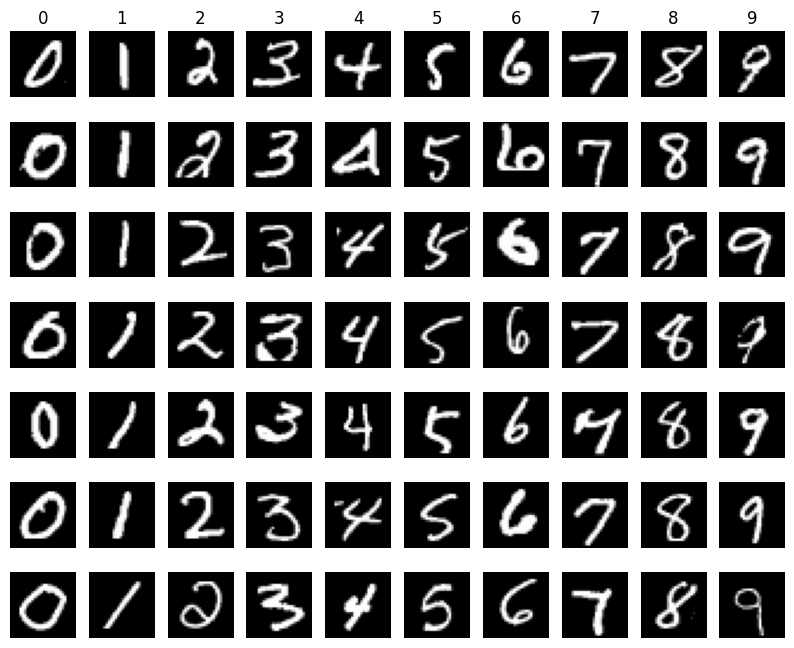

In [53]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((28, 28)))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Data normalization is an important step which ensures that each input parameter has a similar data distribution. This makes convergence faster while training the network.

In [54]:
X_train, X_val, X_test = get_normalized_MNIST_data(X_train, X_val, X_test)

# Train a Good Model!
Open the file `solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train the best fully connected model that you can on MNIST, storing your best model in the `MNIST_best_model` variable. We require you to get at least 95% accuracy on the validation set using a fully connected network.

In [58]:
MNIST_best_model = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on MNIST. Store your     #
# best model in the best_model variable.                                       #
#                                                                              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(
    # TODO 
    category="classification",
    hidden_dims=[512,256,128], 
    reg=0.0,
    dtype=np.float64
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 0.005,
                },
                lr_decay=0.95,
                num_epochs=5, batch_size=16,
                print_every=1000)
solver.train()

MNIST_solver = solver
MNIST_best_model = model

(Iteration 1 / 15625) loss: 2.302646
(Epoch 0 / 5) train acc: 0.142000; val_acc: 0.121800
(Iteration 1001 / 15625) loss: 2.258383
(Iteration 2001 / 15625) loss: 0.289132
(Iteration 3001 / 15625) loss: 0.080017
(Epoch 1 / 5) train acc: 0.925000; val_acc: 0.932000
(Iteration 4001 / 15625) loss: 0.139486
(Iteration 5001 / 15625) loss: 0.093780
(Iteration 6001 / 15625) loss: 0.011921
(Epoch 2 / 5) train acc: 0.953000; val_acc: 0.953800
(Iteration 7001 / 15625) loss: 0.024873
(Iteration 8001 / 15625) loss: 0.006190
(Iteration 9001 / 15625) loss: 0.005906
(Epoch 3 / 5) train acc: 0.982000; val_acc: 0.968300
(Iteration 10001 / 15625) loss: 0.139985
(Iteration 11001 / 15625) loss: 0.016819
(Iteration 12001 / 15625) loss: 0.017598
(Epoch 4 / 5) train acc: 0.991000; val_acc: 0.970300
(Iteration 13001 / 15625) loss: 0.009828
(Iteration 14001 / 15625) loss: 0.045213
(Iteration 15001 / 15625) loss: 0.002733
(Epoch 5 / 5) train acc: 0.983000; val_acc: 0.972500


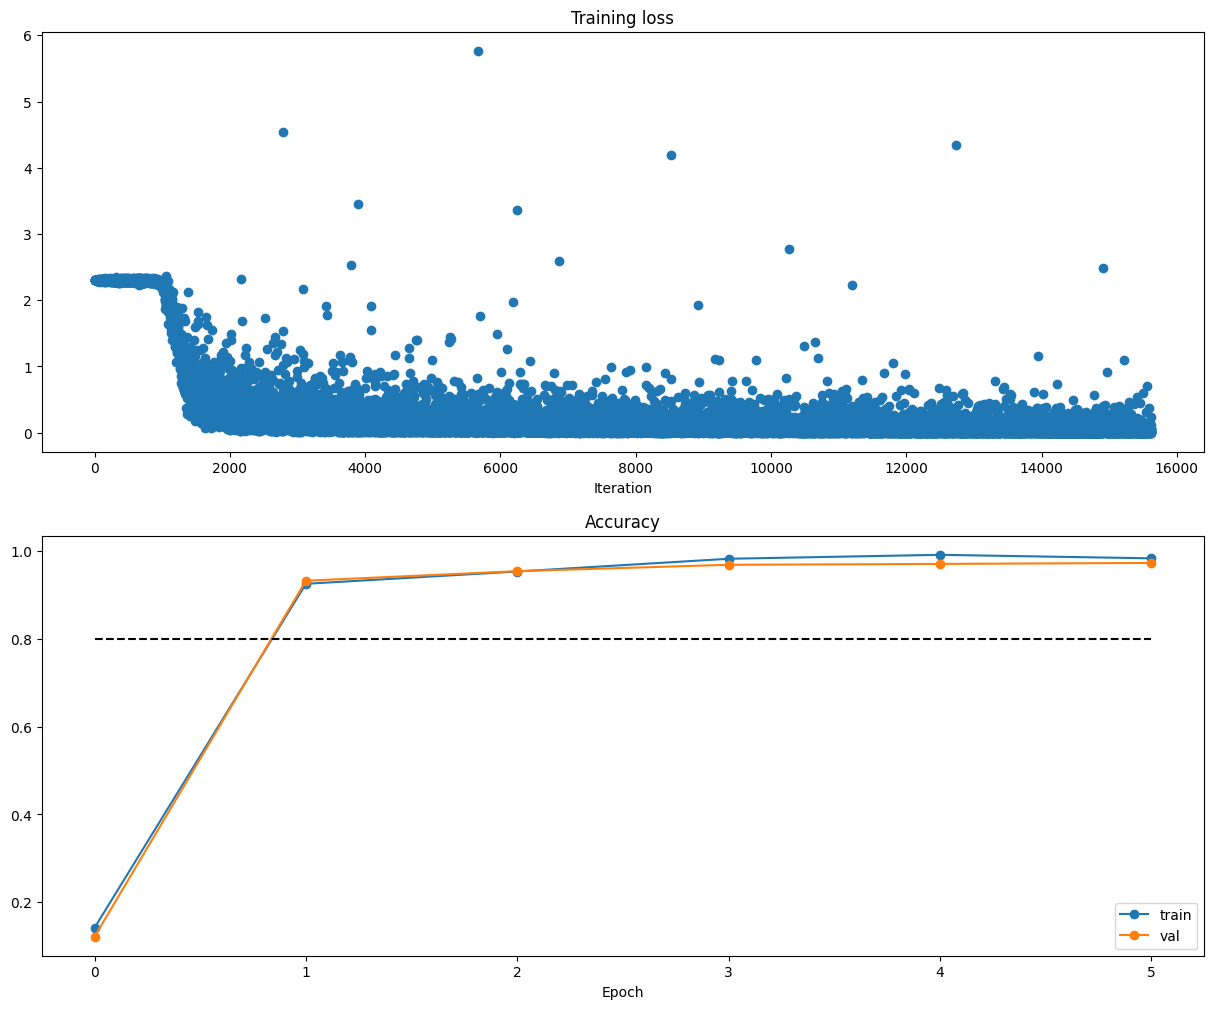

In [59]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(MNIST_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(MNIST_solver.train_acc_history, '-o', label='train')
plt.plot(MNIST_solver.val_acc_history, '-o', label='val')
plt.plot([0.8] * len(MNIST_solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Test Your Model!
Run your best model on the validation and test sets. You should achieve at least 95% accuracy on the validation set.

In [60]:
y_test_pred = np.argmax(MNIST_best_model.loss(data['X_test']), axis=1)
y_val_pred = np.argmax(MNIST_best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Validation set accuracy:  0.9725
Test set accuracy:  0.9694


# California housing dataset
This is a dataset obtained from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

In [61]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
X_train, y_train, X_val, y_val, X_test, y_test = get_california_housing_data()
print('Train data shape: ', X_train.shape)
print('Train target values shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation target values shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test target values shape: ', y_test.shape)

Train data shape:  (15640, 8)
Train target values shape:  (15640,)
Validation data shape:  (2500, 8)
Validation target values shape:  (2500,)
Test data shape:  (2500, 8)
Test target values shape:  (2500,)


In [63]:
X_train, X_val, X_test = get_california_housing_normalized__data(X_train, X_val, X_test)

# Train a Good Model!
Train the best fully connected model that you can on california housing, storing your best model in the `california_housing_best_model` variable.

In [64]:
california_housing_best_model = None

################################################################################
# TODO: Train the best FullyConnectedNet that you can on california housing.   #
# Store your best model in the best_model variable.                            #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

data = {
    'X_train': X_train,
    'y_train': y_train.astype(int),
    'X_val': X_val,
    'y_val': y_val.astype(int),
    'X_test': X_test,
    'y_test': y_test.astype(int)
    }

model = FullyConnectedNet(
    # TODO 
    category="regression",
    hidden_dims=[100, 50, 25], 
    input_dim=8,
    output_dim=1,
    reg=0.0,
    # weight_scale=0.01,
    dtype=np.float64
)
solver = Solver(model, data,
                update_rule=sgd_momentum,
                optim_config={
                  'learning_rate': 0.005,
                },
                lr_decay=0.95,
                num_epochs=20, batch_size=16,
                print_every=1000)
solver.train()

california_housing_solver = solver
california_housing_best_model = model

(Iteration 1 / 19540) loss: 3.250007
(Epoch 0 / 20) train RMS error: 1.981690; val RMS error: 2.598936
(Epoch 1 / 20) train RMS error: 1.210519; val RMS error: 1.505980
(Iteration 1001 / 19540) loss: 1.238689
(Epoch 2 / 20) train RMS error: 1.262248; val RMS error: 1.517666
(Iteration 2001 / 19540) loss: 1.121168
(Epoch 3 / 20) train RMS error: 1.243845; val RMS error: 1.483945
(Iteration 3001 / 19540) loss: 1.126273
(Epoch 4 / 20) train RMS error: 1.226456; val RMS error: 1.463494
(Iteration 4001 / 19540) loss: 1.631497
(Epoch 5 / 20) train RMS error: 1.281500; val RMS error: 1.533885
(Iteration 5001 / 19540) loss: 1.747050
(Epoch 6 / 20) train RMS error: 1.215021; val RMS error: 1.540979
(Iteration 6001 / 19540) loss: 0.628139
(Epoch 7 / 20) train RMS error: 0.690391; val RMS error: 0.868846
(Iteration 7001 / 19540) loss: 0.274038
(Epoch 8 / 20) train RMS error: 0.707072; val RMS error: 1.031435
(Iteration 8001 / 19540) loss: 0.203010
(Epoch 9 / 20) train RMS error: 0.689685; val RMS

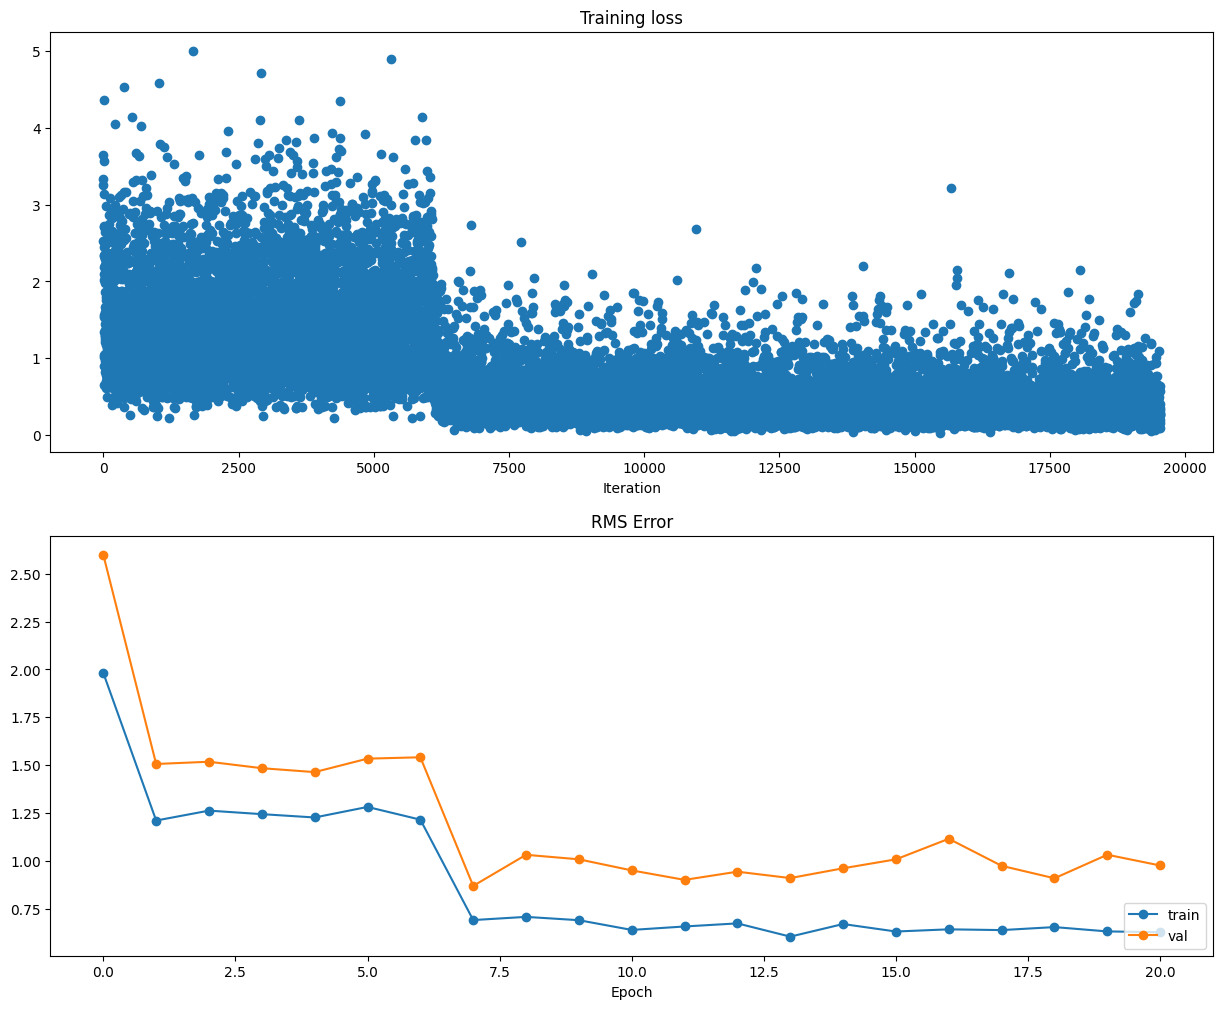

In [66]:
# Run this cell to visualize training loss and train / val RMS error

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(california_housing_solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('RMS Error')
plt.plot(california_housing_solver.train_acc_history, '-o', label='train')
plt.plot(california_housing_solver.val_acc_history, '-o', label='val')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()